In [124]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [125]:
# Import csv
file = Path('crypto_data.csv')
df = pd.read_csv(file)

In [126]:
#df

In [127]:
# Discard all cryptocurrencies that are not being traded
# Remove all rows that have at least one null value.
df = df.drop(df.index[df['IsTrading'] == False]).dropna()
df = df.drop('IsTrading', 1)

In [128]:
#df

In [129]:
# Filter for cryptocurrencies that have been mined
df = df.drop(df.index[df['TotalCoinsMined'] <= 0])

In [130]:
#df

In [131]:
# Delete CoinName
df = df.drop('CoinName', 1)
# Delete Unnamed
df = df.drop('Unnamed: 0', 1)

In [132]:
#df

In [133]:
df["TotalCoinSupply"] = df["TotalCoinSupply"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [135]:
# Convert the remaining features with text values, Algorithm and ProofType, into numerical data
# Create dummy variables. 
df = pd.get_dummies(df, drop_first = True)
df

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# Standardize your dataset
df_scaled = StandardScaler().fit_transform(df)
df_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [138]:
# Dimensionality reduction with PCA
pca = PCA(n_components = 0.9)
df_pca = pca.fit_transform(df_scaled)

In [144]:
df_crypto = pd.DataFrame(data = df_pca)
df_crypto.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,-4.364932e-14,3.249613e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,2.111954e-16,4.990967e-17,-1.589248e-18,-8.273444e-16,-2.107261e-15,-6.460354e-15,-2.188289e-15,3.966798e-15,3.941419e-16,4.120899e-15
1,-0.319249,1.043547,-0.537804,0.001337,-4.370949e-14,3.260245e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,2.395980e-16,1.304518e-16,-1.085666e-16,-1.051750e-15,-2.228620e-15,-6.545091e-15,-2.226101e-15,3.766734e-15,2.493371e-16,3.552016e-15
2,2.304716,1.669996,-0.624077,0.004420,-6.792539e-14,4.166980e-14,-0.062312,-1.554093,-0.945690,0.375087,...,-1.174593e-14,8.191332e-15,-7.242621e-14,-3.341046e-14,4.608958e-14,1.395859e-14,1.547672e-14,1.902873e-15,-6.706214e-14,-7.840135e-14
3,-0.145455,-1.323925,0.177429,-0.001167,1.751217e-14,-1.366167e-14,0.000326,0.283548,0.252906,-0.079820,...,-3.433881e-15,-4.638376e-15,-8.058235e-15,6.148385e-16,1.542413e-14,4.311477e-15,5.914555e-15,5.953485e-15,-2.661593e-14,-2.021233e-14
4,-0.151951,-2.044976,0.364208,-0.001636,3.208023e-14,-1.805419e-14,0.032350,0.524429,0.191031,0.074021,...,-1.013016e-14,-1.339723e-13,1.358793e-13,6.926343e-14,5.786080e-14,-1.583295e-14,1.617152e-13,1.314345e-13,-1.675169e-13,-6.900679e-14


In [145]:
pca.explained_variance_ratio_

array([0.02851314, 0.02183228, 0.02093007, 0.02087258, 0.02087257,
       0.02087257, 0.02085124, 0.01910435, 0.0179288 , 0.01777379,
       0.01662938, 0.01629408, 0.01583495, 0.01464966, 0.0134856 ,
       0.01262337, 0.01231377, 0.01127287, 0.01093674, 0.01070932,
       0.01062572, 0.01060732, 0.01059359, 0.0105697 , 0.01055562,
       0.01051051, 0.01049655, 0.01049558, 0.01049558, 0.01049558,
       0.01049381, 0.01048438, 0.01047714, 0.01047581, 0.01047329,
       0.01047115, 0.01046928, 0.01046411, 0.01046265, 0.01045618,
       0.01045597, 0.01045597, 0.01045525, 0.01045351, 0.01044982,
       0.01044805, 0.0104431 , 0.01043743, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628])

In [146]:
# Run t-SNE
tsne = TSNE(learning_rate = 250)
tsne_features = tsne.fit_transform(df_crypto)
tsne_features.shape

(532, 2)

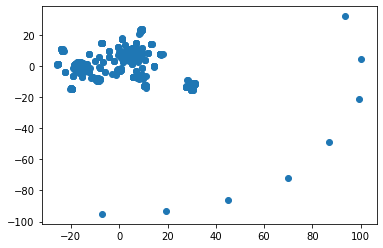

In [148]:
# Plot
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

C:\Users\16309\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


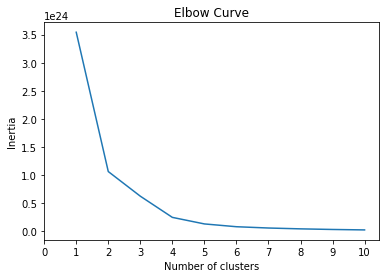

In [151]:
# Create an elbow plot to identify the best number of clusters
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

# Plot
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

k = 4

### Can the cryptocurrencies be clustered together? If so, into how many clusters?
#### Yes, the cryptocurrencies can be clustered together. The amount of clusters would be 4.
